In [1]:
# This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
# The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
# It contains only numerical input variables which are the result of a PCA transformation.
#  Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
# The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plusmodules as plus
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [86]:
df=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised_Categorical\\Files\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


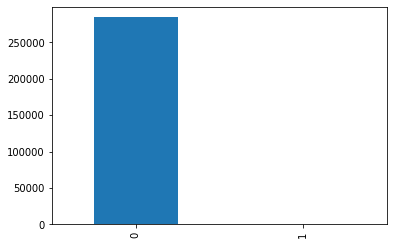

In [87]:
df['Class'].value_counts().plot(kind='bar')

In [88]:
df_scale=df[['Time','Amount']]
df_scale=df_scale.apply(zscore)
df_scale
df.drop(['Time','Amount'],axis=1,inplace=True)

In [89]:
df=pd.concat([df,df_scale],axis=1)

In [90]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,1.641931,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,1.641952,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,1.641974,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,1.641974,-0.313249


Splitting the data in train and  test in 70 and 30

In [91]:

X=df.drop('Class',axis=1)
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [92]:
print("Train")
print(X_train.shape)
print(y_train.shape)
print("Test")
print(X_test.shape)
print(y_test.shape)

Train
(199364, 30)
(199364,)
Test
(85443, 30)
(85443,)


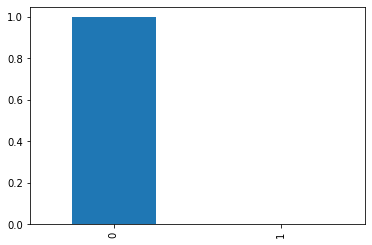

In [93]:
# Before SMOTE
before_sm=pd.concat([X_train,y_train],axis=1)
before_sm['Class'].value_counts(normalize=True).plot(kind='bar')

In [94]:
df_pca=df.drop(['Time','Amount','Class'],axis=1)
cov_matrix = np.cov(df_pca.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [95]:
#Cumulative Variance
tot = sum(eig_vals)
var_before_sm = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print(var_before_sm)
cum_var_before_sm = np.cumsum(var_before_sm)
print("Cumulative Variance Explained", cum_var_before_sm)

[12.483757070715829, 8.872945165992101, 7.480933909661233, 6.523147645441736, 6.199044862599424, 5.775592325505676, 4.979852070446335, 4.641695658793702, 3.927497188236501, 3.8578669602339253, 3.3901478484101077, 3.2487581472394105, 3.223271155117103, 2.990075783501447, 2.726173187347404, 2.498447609718765, 2.3473155499991236, 2.2860303012586023, 2.1562710323627794, 1.9339071093855191, 1.755590900590049, 1.7136709586228678, 1.268881260666938, 1.1935773284709958, 0.8841994354395621, 0.7566837244956779, 0.5301314480189608, 0.3545343617282234]
Cumulative Variance Explained [ 12.48375707  21.35670224  28.83763615  35.36078379  41.55982865
  47.33542098  52.31527305  56.95696871  60.8844659   64.74233286
  68.13248071  71.38123885  74.60451001  77.59458579  80.32075898
  82.81920659  85.16652214  87.45255244  89.60882347  91.54273058
  93.29832148  95.01199244  96.2808737   97.47445103  98.35865047
  99.11533419  99.64546564 100.        ]


AS the dataset is imbalanced lets consider using smote-Synthetic Minority oversampling

In [96]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=3)
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)

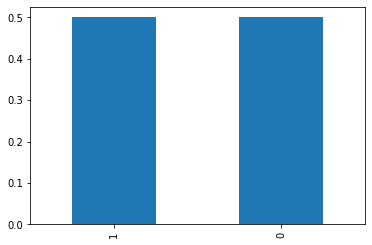

In [97]:
aftr_sm=pd.concat([X_train_sm,y_train_sm],axis=1)
aftr_sm['Class'].value_counts(normalize=True).plot(kind='bar')

In [121]:
train=aftr_sm
test=pd.concat([X_test,y_test],axis=1)
random_df=pd.concat([train,test])
x_random=random_df.drop('Class',axis=1)
y_random=random_df['Class']

In [115]:
x_random

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount
0,-2.664732,0.231862,-1.104641,-0.609571,1.773723,-1.943877,0.458348,0.491462,-1.428488,-0.634482,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.996583,0.244964
1,-2.108115,2.543741,-1.526934,-0.769287,0.743216,1.034052,-1.239081,-4.443318,1.491631,0.038221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-3.253089,-1.182952,-0.432007,0.490969,-2.109627,1.743469,1.502307,0.492965,-1.560480,0.499926,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.996562,1.160686
3,2.020445,-0.135809,-1.565006,0.545948,0.060337,-1.137793,0.322537,-0.228598,0.335233,0.348563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.427383,-1.688114,-1.099026,-0.598914,-0.976942,-0.582149,-0.127211,-0.172988,1.574125,-0.542365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398043,-2.547969,5.799681,-7.621845,6.394282,-0.064777,-3.135908,-3.104462,1.818928,-3.874087,-7.287586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398044,-16.235978,10.464607,-19.461331,6.105314,-12.771311,-4.075684,-14.003521,10.900807,-3.444866,-9.455542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398045,-2.541365,0.903691,-1.434368,1.500570,-1.169471,-0.350316,-1.533116,-0.091486,-0.364458,-2.532390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398046,-2.624464,2.164191,-5.092106,1.440026,-1.624228,-0.856322,-3.592625,1.855836,-0.903467,-5.514614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
print("Train")
print(X_train_sm.shape)
print(y_train_sm.shape)

Train
(398048, 30)
(398048,)


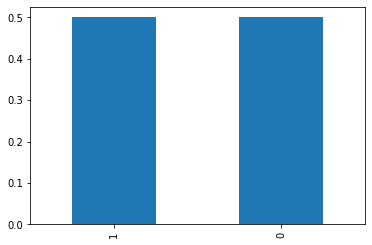

In [107]:
aftr_sm['Class'].value_counts(normalize=True).plot(kind='bar')

<Figure size 2160x1440 with 0 Axes>

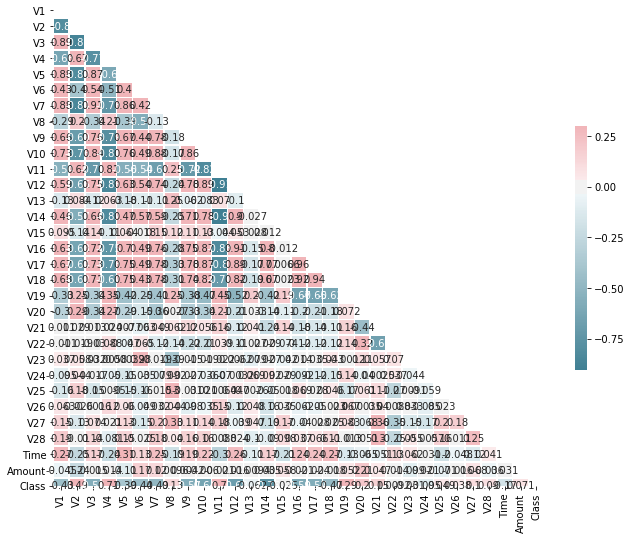

In [108]:
plt.figure(figsize=(30,20))
plus.corr_matrix(aftr_sm)


In [109]:
df_corr=aftr_sm.corr()
df_corr['Class']

V1       -0.431141
V2        0.485243
V3       -0.553863
V4        0.706402
V5       -0.386739
V6       -0.443486
V7       -0.486789
V8        0.130469
V9       -0.568234
V10      -0.637474
V11       0.699825
V12      -0.681116
V13      -0.062188
V14      -0.760383
V15      -0.025142
V16      -0.592960
V17      -0.568566
V18      -0.471677
V19       0.290884
V20       0.201758
V21       0.154444
V22       0.009182
V23      -0.030519
V24      -0.095344
V25       0.048753
V26       0.038241
V27       0.104918
V28       0.090334
Time     -0.174449
Amount    0.071378
Class     1.000000
Name: Class, dtype: float64

In [110]:
aftr_sm

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,-2.664732,0.231862,-1.104641,-0.609571,1.773723,-1.943877,0.458348,0.491462,-1.428488,-0.634482,...,0.614231,-1.300178,-0.164782,1.376627,1.143853,0.022561,-0.507854,0.758236,-0.307251,0
1,-2.108115,2.543741,-1.526934,-0.769287,0.743216,1.034052,-1.239081,-4.443318,1.491631,0.038221,...,-0.486210,0.635596,-0.318811,-0.592228,-0.246447,0.171130,0.277897,0.137385,-0.349231,0
2,-3.253089,-1.182952,-0.432007,0.490969,-2.109627,1.743469,1.502307,0.492965,-1.560480,0.499926,...,-0.569052,-0.706064,0.247650,0.549410,-0.414145,0.359230,-0.564331,0.661896,1.901691,0
3,2.020445,-0.135809,-1.565006,0.545948,0.060337,-1.137793,0.322537,-0.228598,0.335233,0.348563,...,0.131744,0.083293,0.084534,0.118334,0.359219,-0.098190,-0.085801,1.204200,-0.313289,0
4,1.427383,-1.688114,-1.099026,-0.598914,-0.976942,-0.582149,-0.127211,-0.172988,1.574125,-0.542365,...,-0.741230,0.027549,-0.639827,-0.696188,0.339728,-0.108502,0.006189,0.727196,1.052698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398043,-2.547969,5.799681,-7.621845,6.394282,-0.064777,-3.135908,-3.104462,1.818928,-3.874087,-7.287586,...,-0.446890,-0.400710,-0.288564,1.011385,0.424736,0.400358,0.307794,-1.809479,-0.349231,1
398044,-16.235978,10.464607,-19.461331,6.105314,-12.771311,-4.075684,-14.003521,10.900807,-3.444866,-9.455542,...,-1.218677,-0.638954,0.072811,1.029632,-0.254605,1.697405,0.519985,-1.465633,0.046539,1
398045,-2.541365,0.903691,-1.434368,1.500570,-1.169471,-0.350316,-1.533116,-0.091486,-0.364458,-2.532390,...,0.548271,0.148285,-0.364465,-0.180915,1.055740,-0.936293,0.740741,-0.748725,-0.004180,1
398046,-2.624464,2.164191,-5.092106,1.440026,-1.624228,-0.856322,-3.592625,1.855836,-0.903467,-5.514614,...,0.415158,0.150711,-0.305959,-0.308299,0.504820,0.269853,-0.089602,0.439900,-0.067880,1


In [111]:
#Creating a RandomForest
# Hyperparameter Tuning

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

In [124]:
rfc=RandomForestClassifier()
params={
    'criterion':['gini','entropy'],
    'max_features':sp_randint(1,24),
    'max_depth':sp_randint(2,10),
    'min_samples_split':sp_randint(2,20),
    'min_samples_leaf':sp_randint(1,20)
}

In [125]:
rsearch=RandomizedSearchCV(rfc,cv=3,param_distributions=params,scoring='roc_auc')
rsearch.fit(x_random,y_random)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               